# Turbofan Engine Degradation Simulation Data Set

Engine degradation simulation was carried out using C-MAPSS. Four different were sets simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. The data set was provided by the Prognostics CoE at NASA Ames.


In [15]:
import pandas as pd
import csv
import numpy as np

import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib as plt
from socket import socket
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('./CMAPSSData/train_FD001.csv',sep=" ", header= None)
df.columns = ["Unit Number",
              "Time, in cycles",
             "Operational setting 1",
             "Operational setting 2",
             "Operational setting 3",
             "Sensor measurement 1",
             "Sensor measurement 2",
             "Sensor measurement 3",
             "Sensor measurement 4",
             "Sensor measurement 5",
             "Sensor measurement 6",
             "Sensor measurement 7",
             "Sensor measurement 8",
             "Sensor measurement 9",
             "Sensor measurement 10",
             "Sensor measurement 11",
             "Sensor measurement 12",
             "Sensor measurement 13",
             "Sensor measurement 14",
             "Sensor measurement 15",
             "Sensor measurement 16",
             "Sensor measurement 17",
             "Sensor measurement 18",
             "Sensor measurement 19",
             "Sensor measurement 20",
             "Sensor measurement 21"]
df

Unit Number  Time, in cycles  Operational setting 1  \
0                1                1                -0.0007   
1                1                2                 0.0019   
2                1                3                -0.0043   
3                1                4                 0.0007   
4                1                5                -0.0019   
5                1                6                -0.0043   
6                1                7                 0.0010   
7                1                8                -0.0034   
8                1                9                 0.0008   
9                1               10                -0.0033   
10               1               11                 0.0018   
11               1               12                 0.0016   
12               1               13                -0.0019   
13               1               14                 0.0009   
14               1               15                -0.0018   
15               1               16                 0.0006   
16               1               17                 0.0002   
17               1               18                -0.0031   
18               1               19                 0.0032   
19               1               20                -0.0037   
20               1               21                -0.0012   
21               1               22                 0.0002   
22               1               23                 0.0034   
23               1               24                -0.0010   
24               1               25                 0.0023   
25               1               26                 0.0000   
26               1               27                -0.0012   
27               1               28                -0.0024   
28               1               29                 0.0012   
29               1               30                -0.0022   
...            ...              ...                    ...   
20601          100              171                -0.0005   
20602          100              172                -0.0037   
20603          100              173                 0.0006   
20604          100              174                 0.0011   
20605          100              175                -0.0013   
20606          100              176                -0.0017   
20607          100              177                -0.0011   
20608          100              178                 0.0005   
20609          100              179                 0.0020   
20610          100              180                -0.0010   
20611          100              181                 0.0024   
20612          100              182                 0.0007   
20613          100              183                -0.0011   
20614          100              184                 0.0027   
20615          100              185                -0.0014   
20616          100              186                 0.0026   
20617          100              187                 0.0015   
20618          100              188                -0.0008   
20619          100              189                 0.0015   
20620          100              190                -0.0001   
20621          100              191                -0.0005   
20622          100              192                -0.0009   
20623          100              193                -0.0001   
20624          100              194                -0.0011   
20625          100              195                -0.0002   
20626          100              196                -0.0004   
20627          100              197                -0.0016   
20628          100              198                 0.0004   
20629          100              199                -0.0011   
20630          100              200                -0.0032   

       Operational setting 2  Operational setting 3  Sensor measurement 1  \
0                    -0.0004                  100.0                518.67   
1       

### Plotting the data over cycles

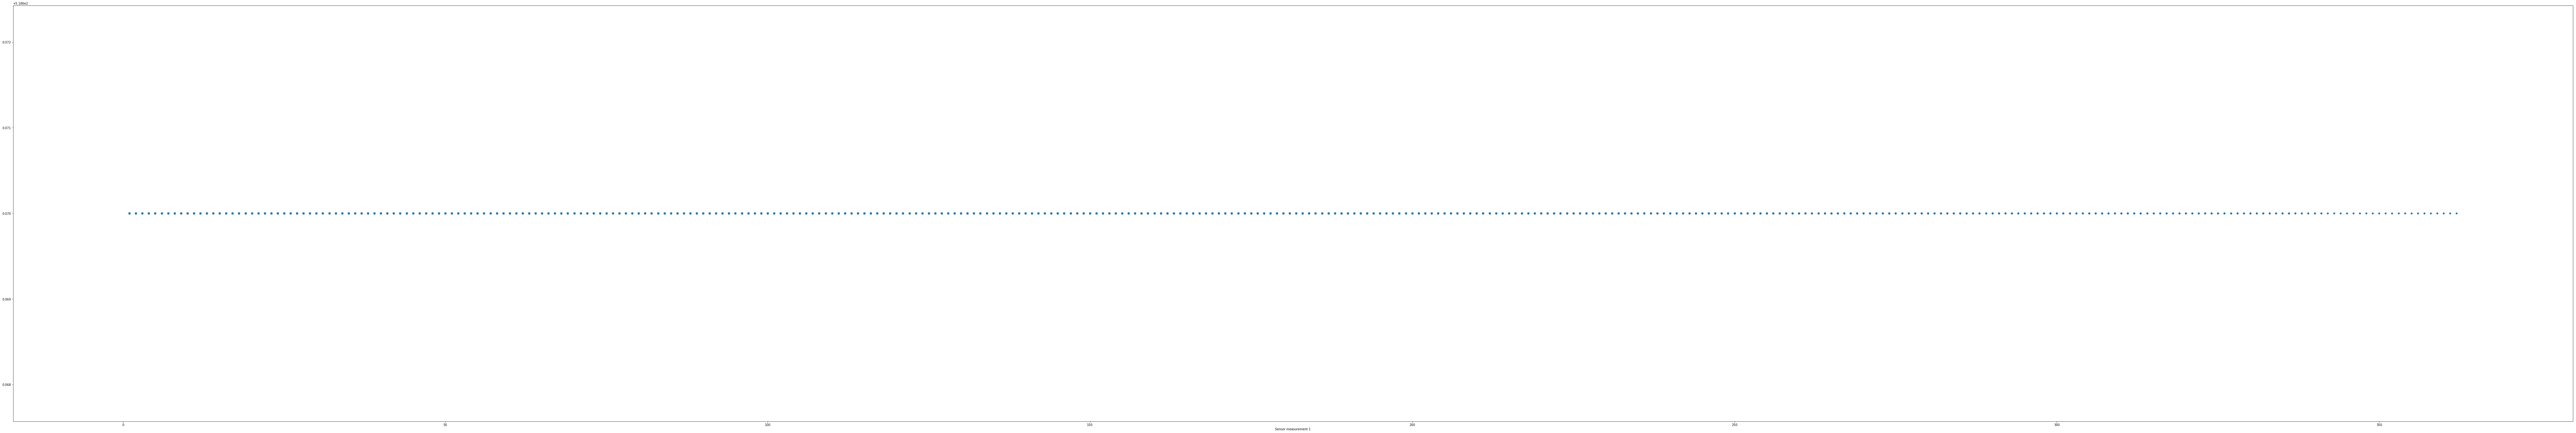

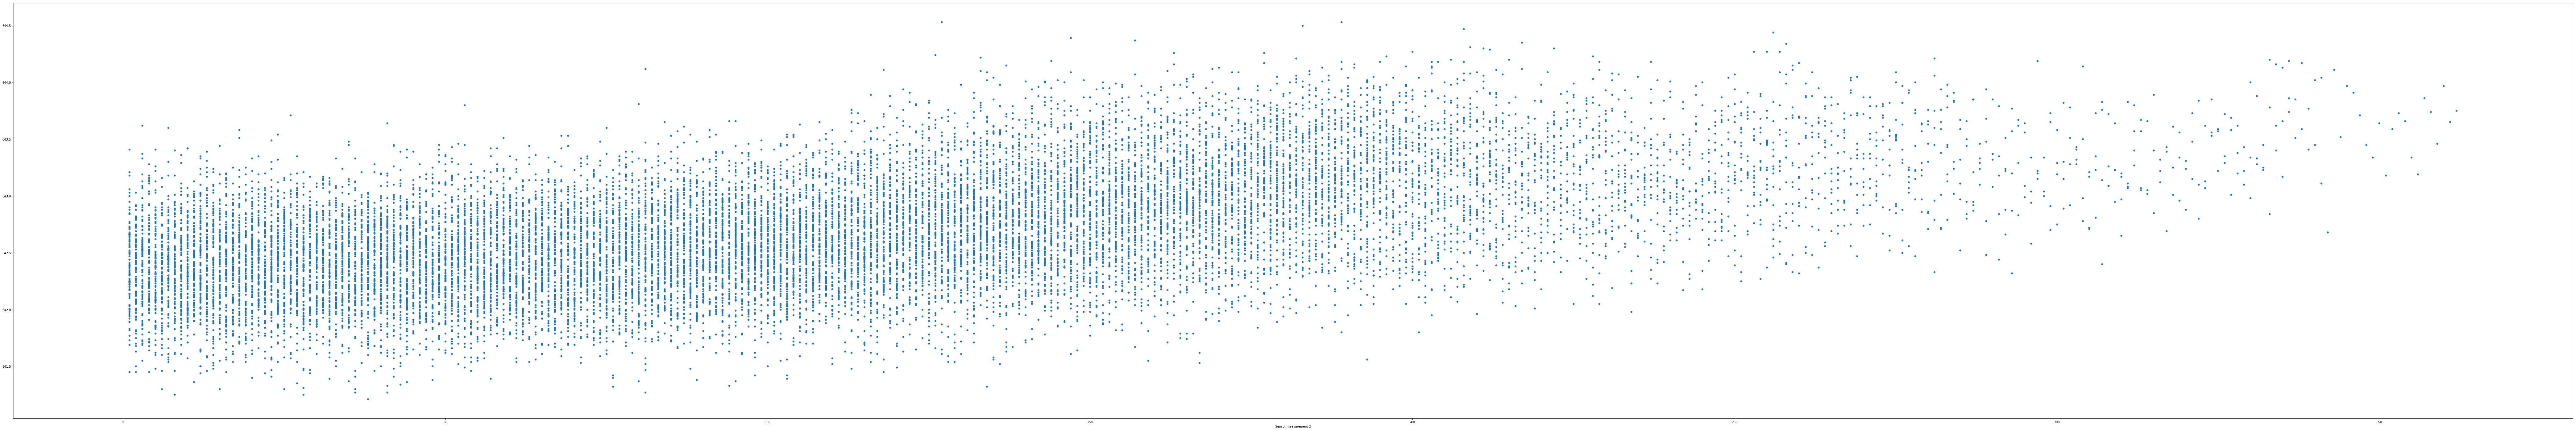

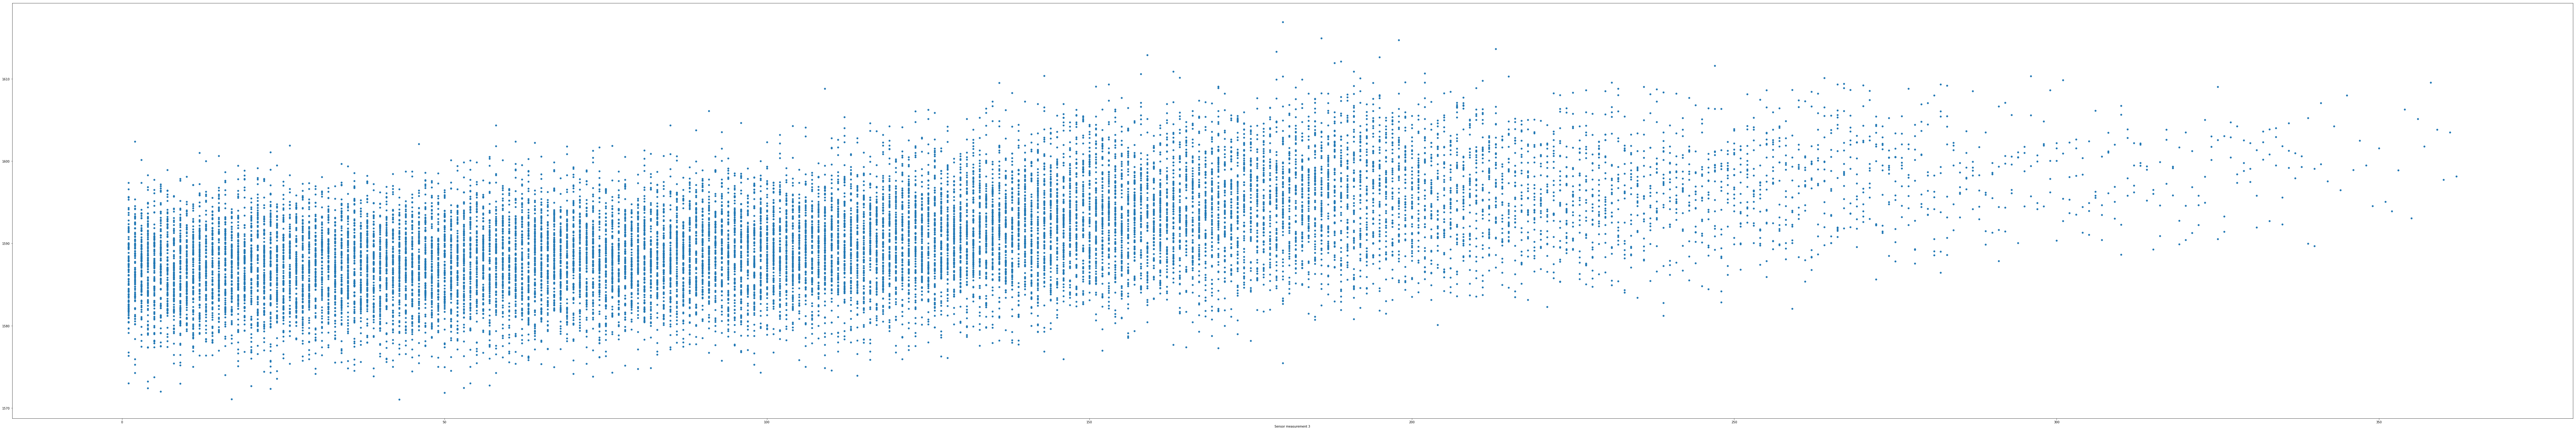

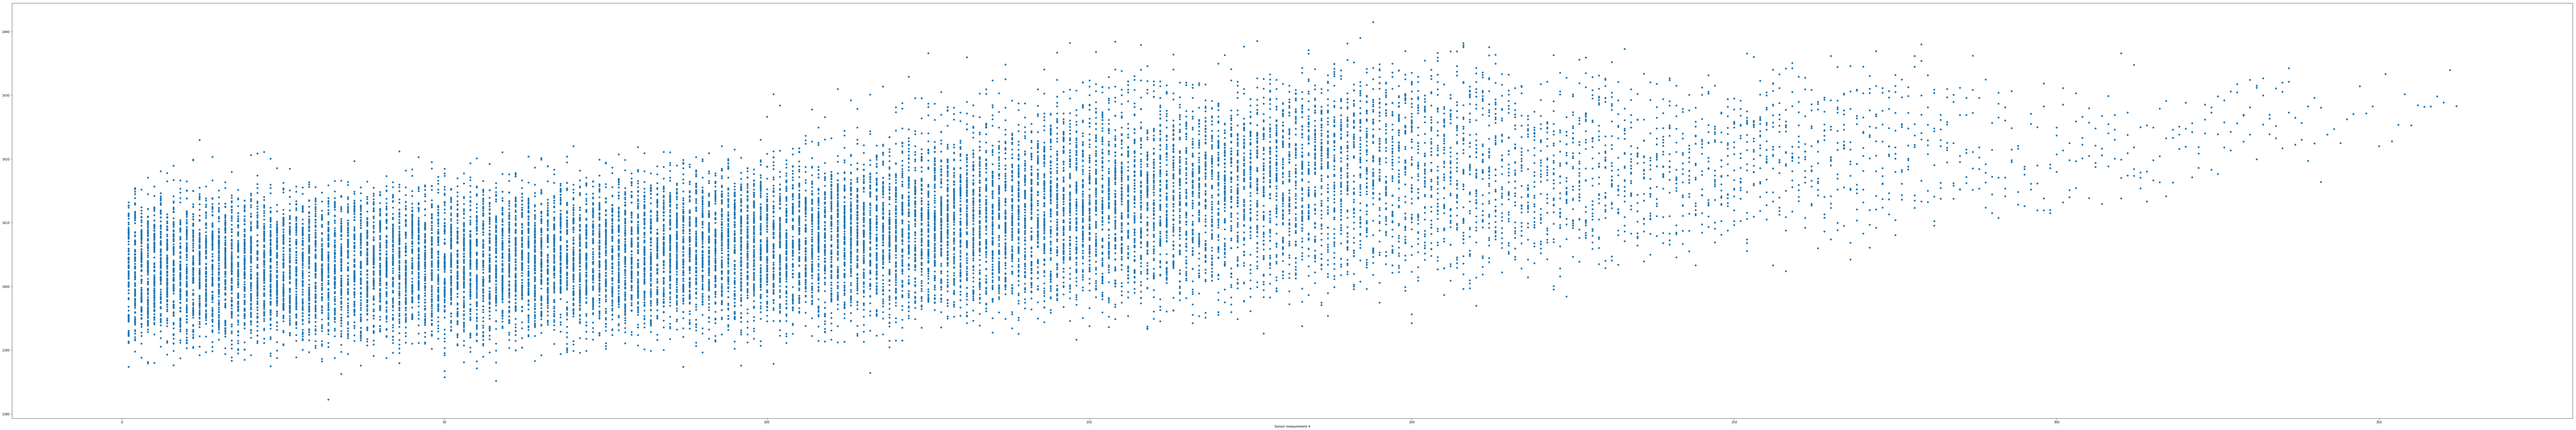

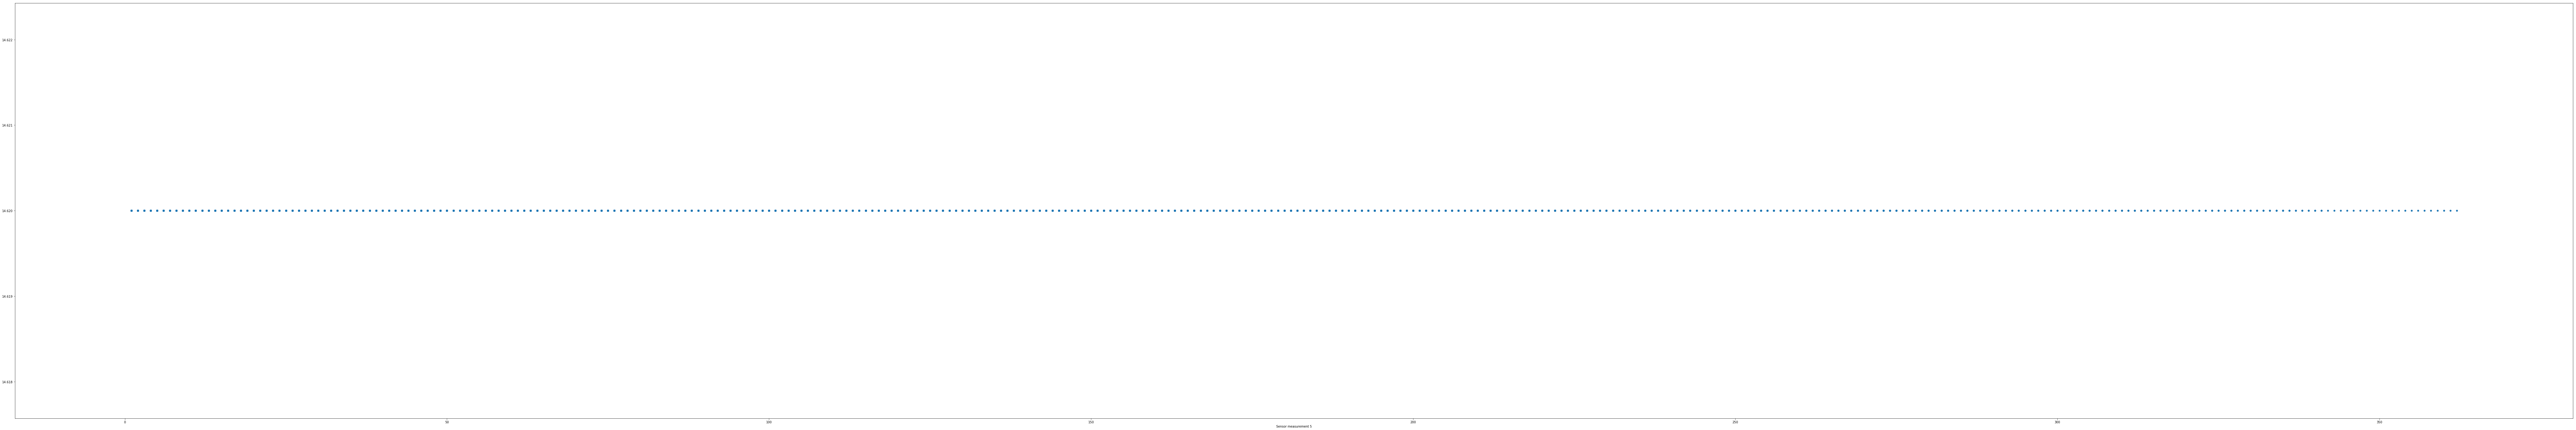

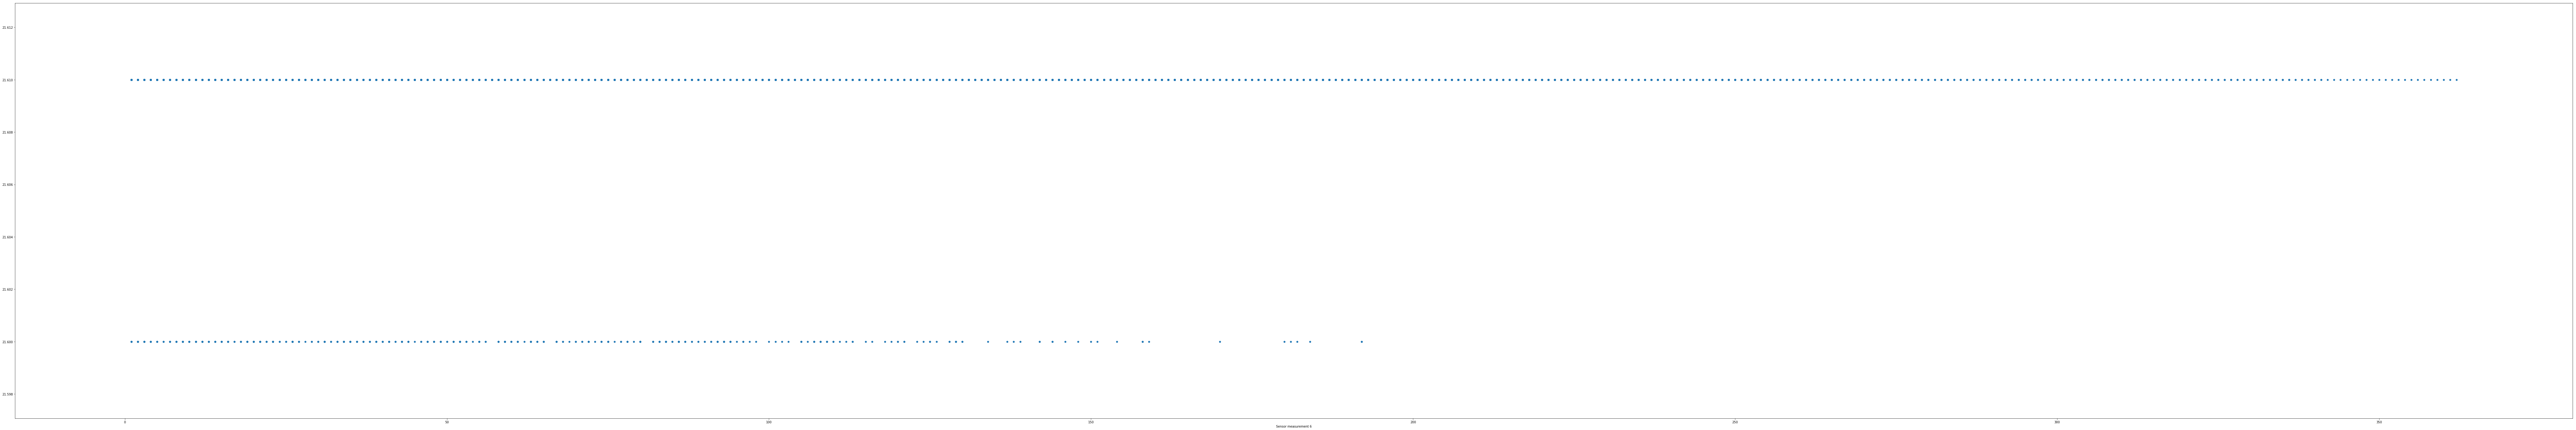

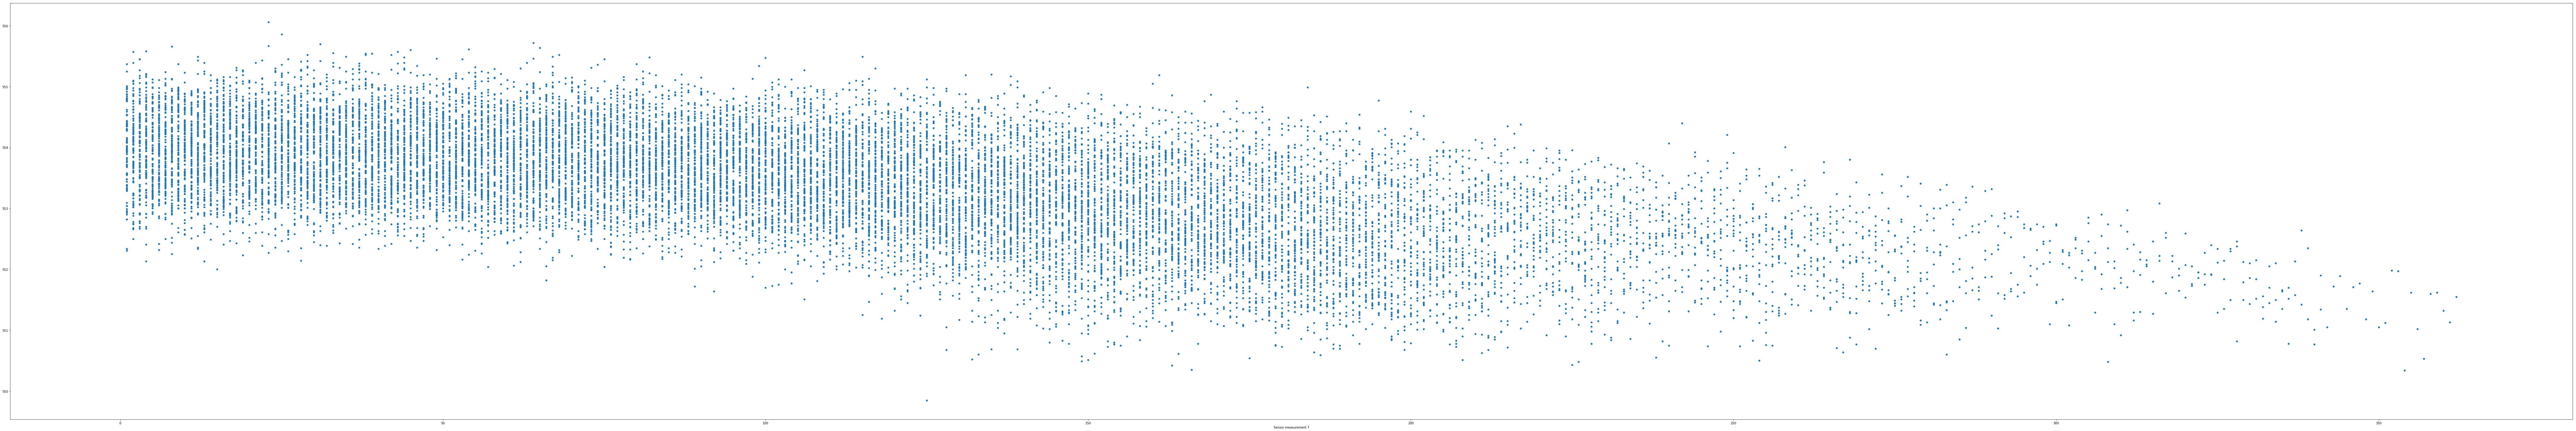

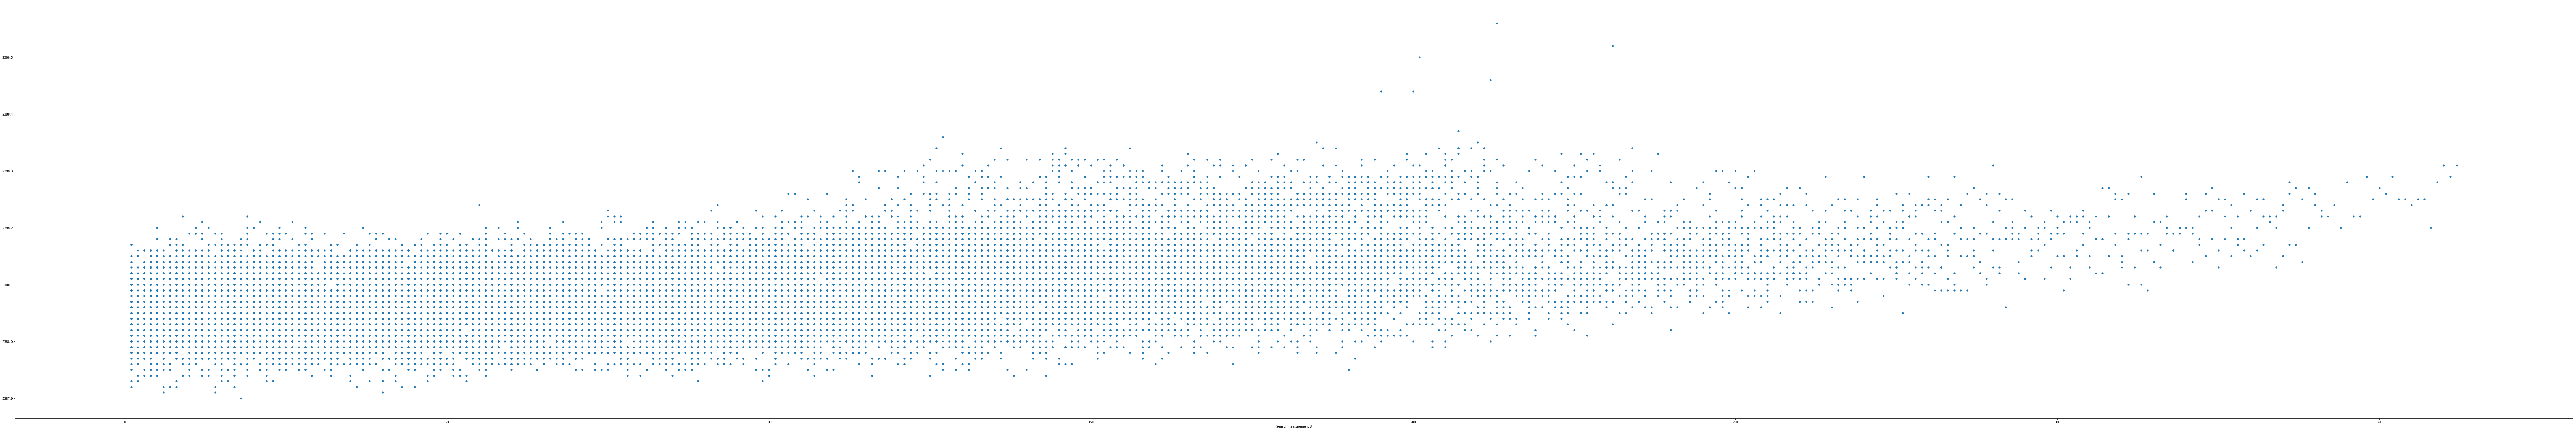

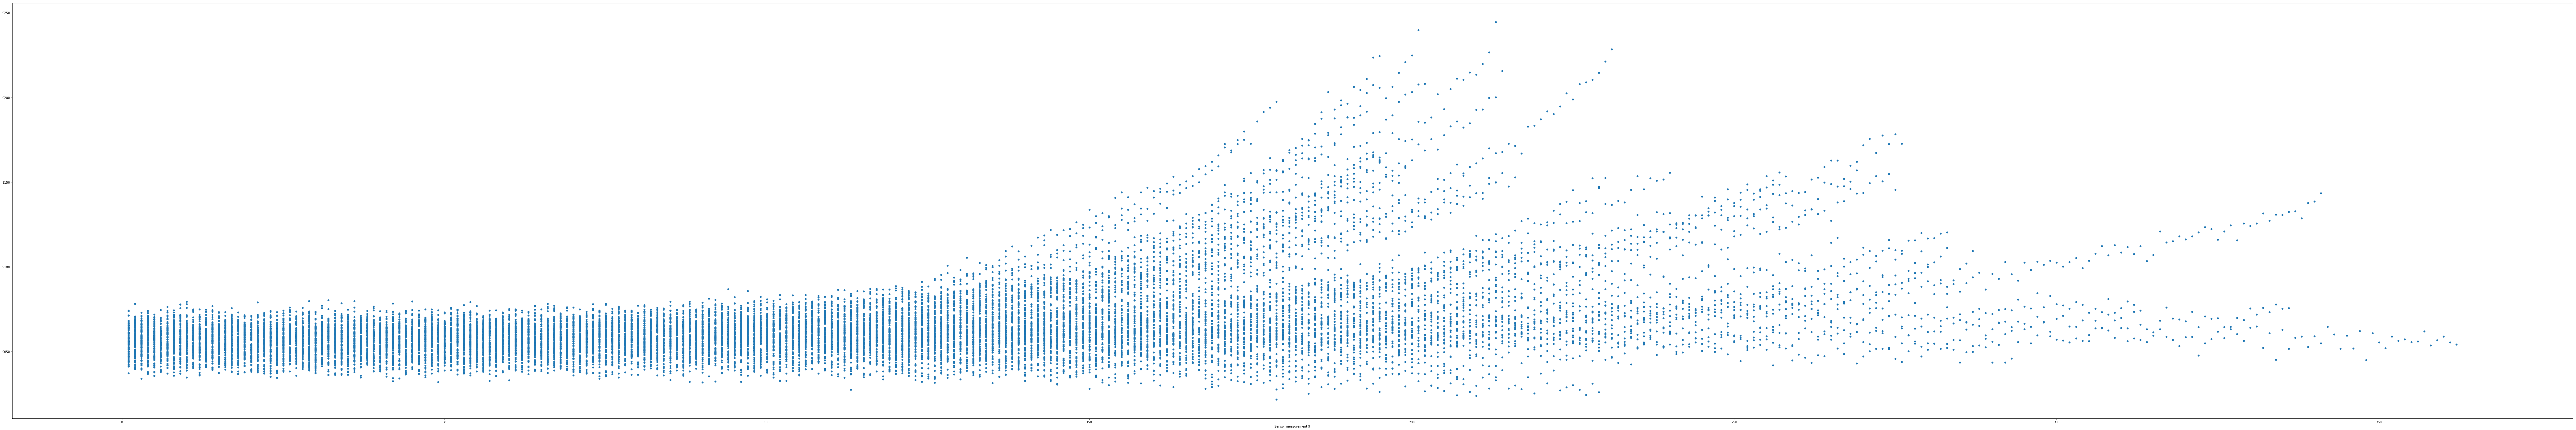

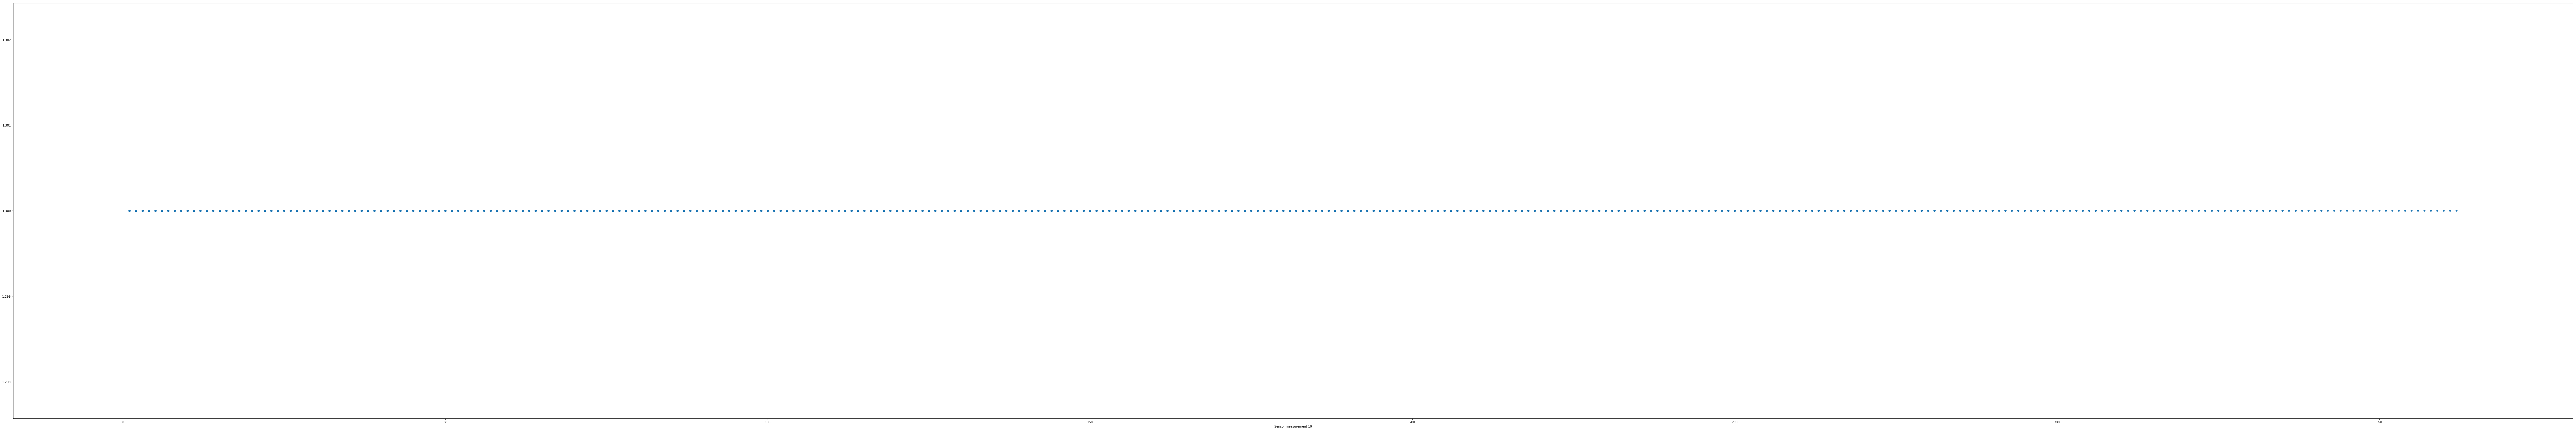

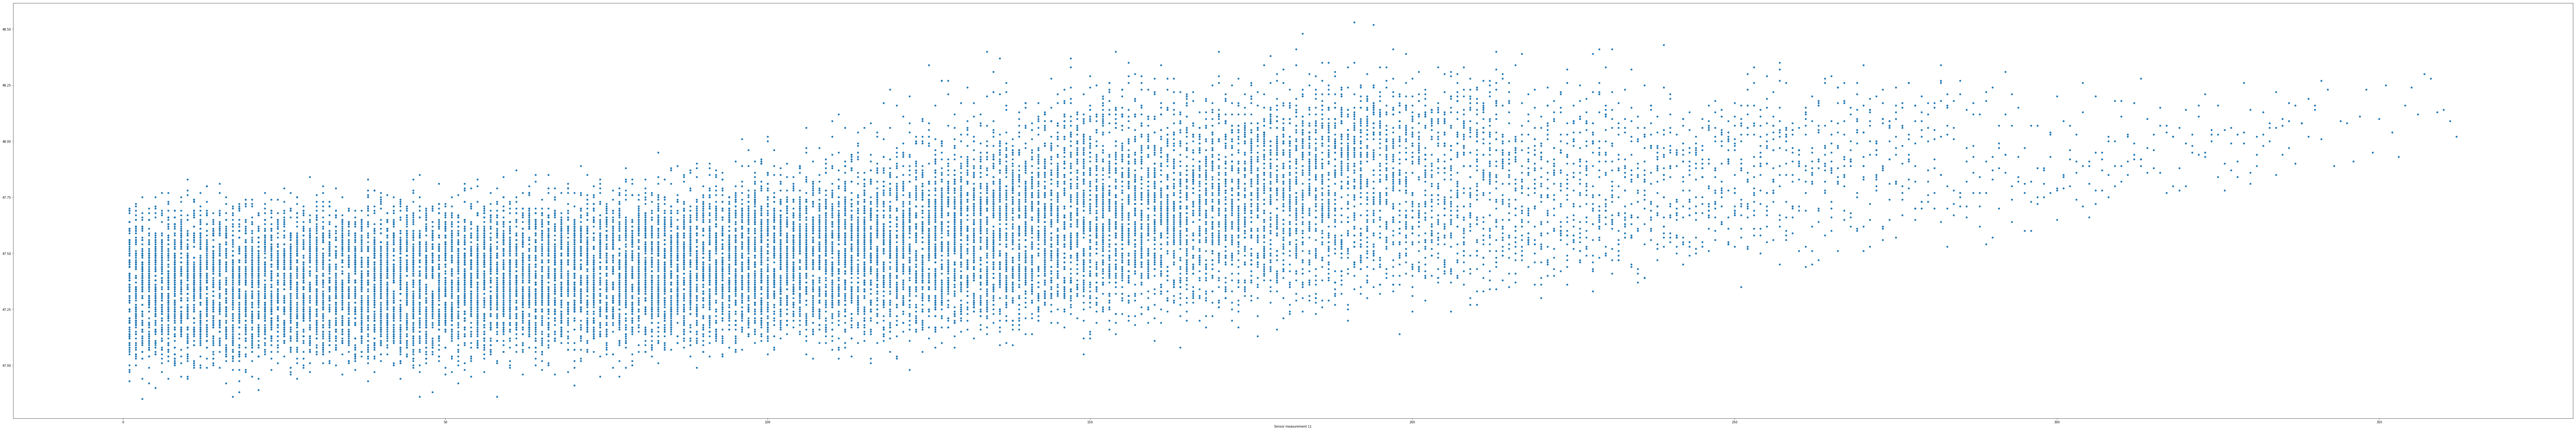

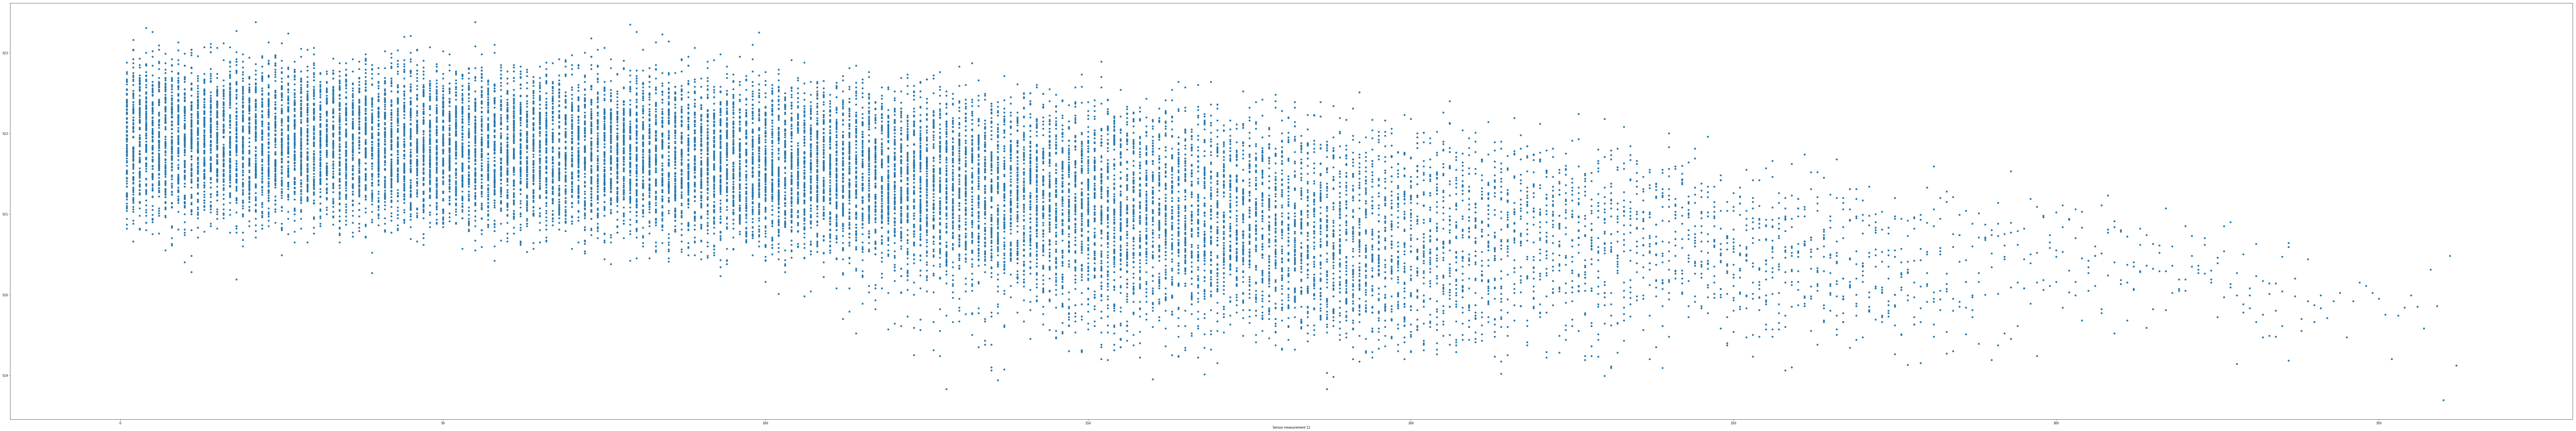

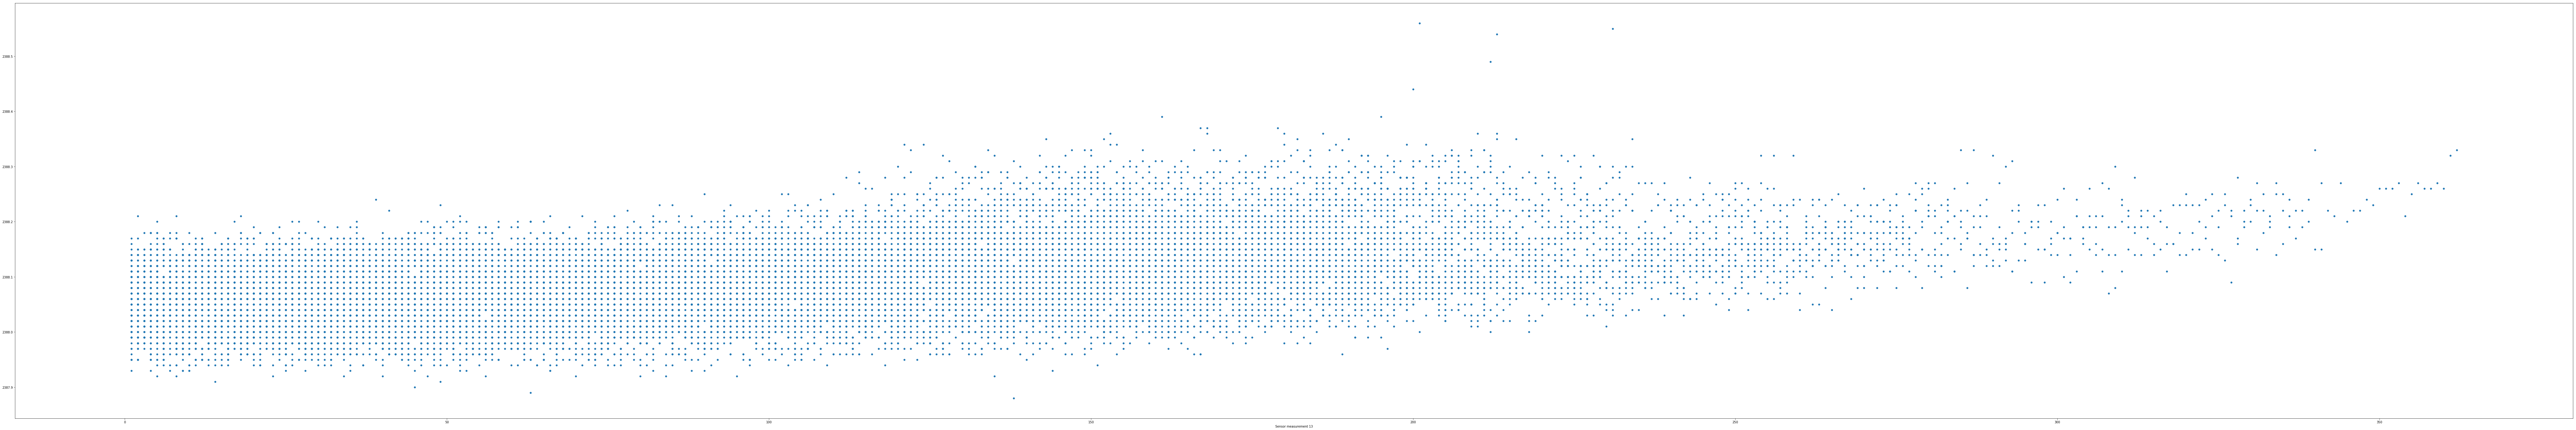

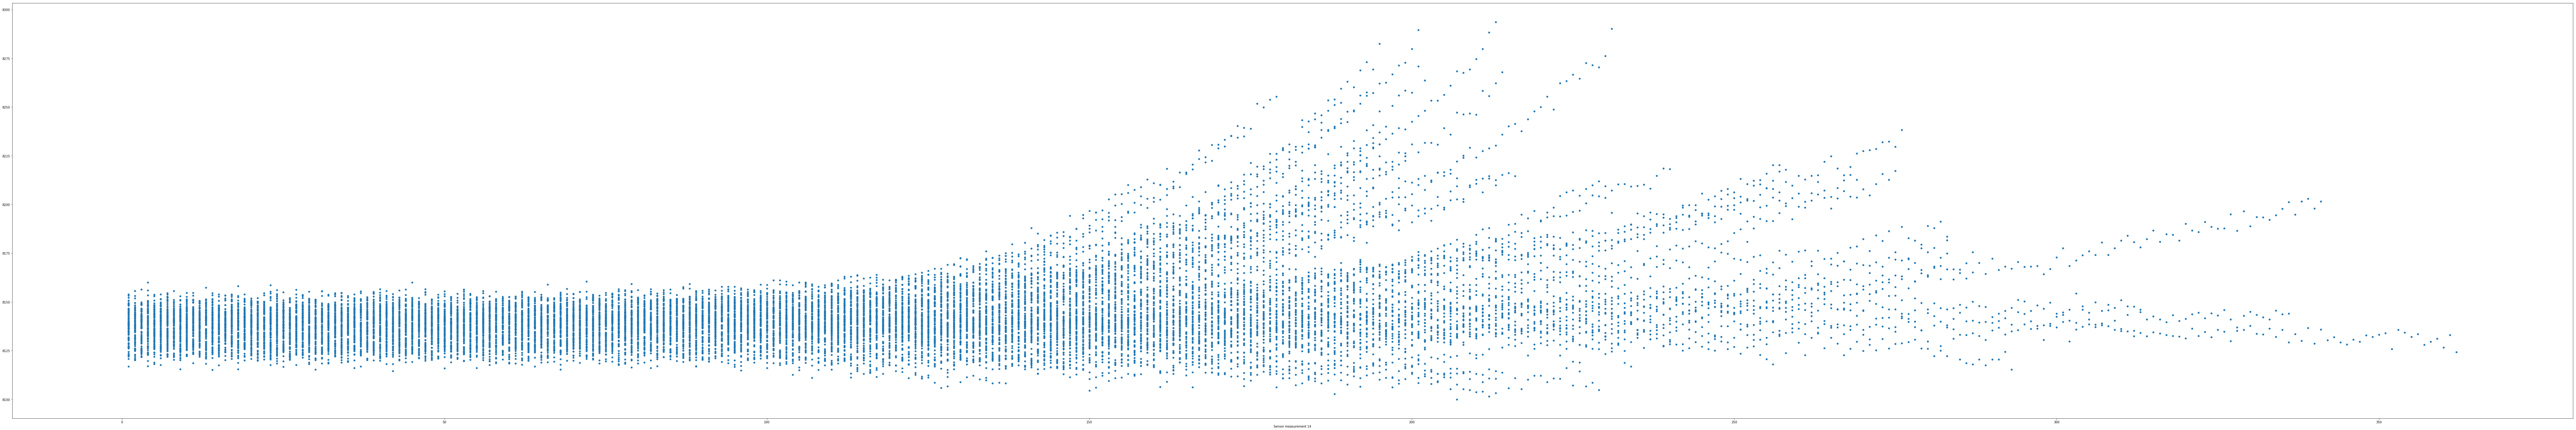

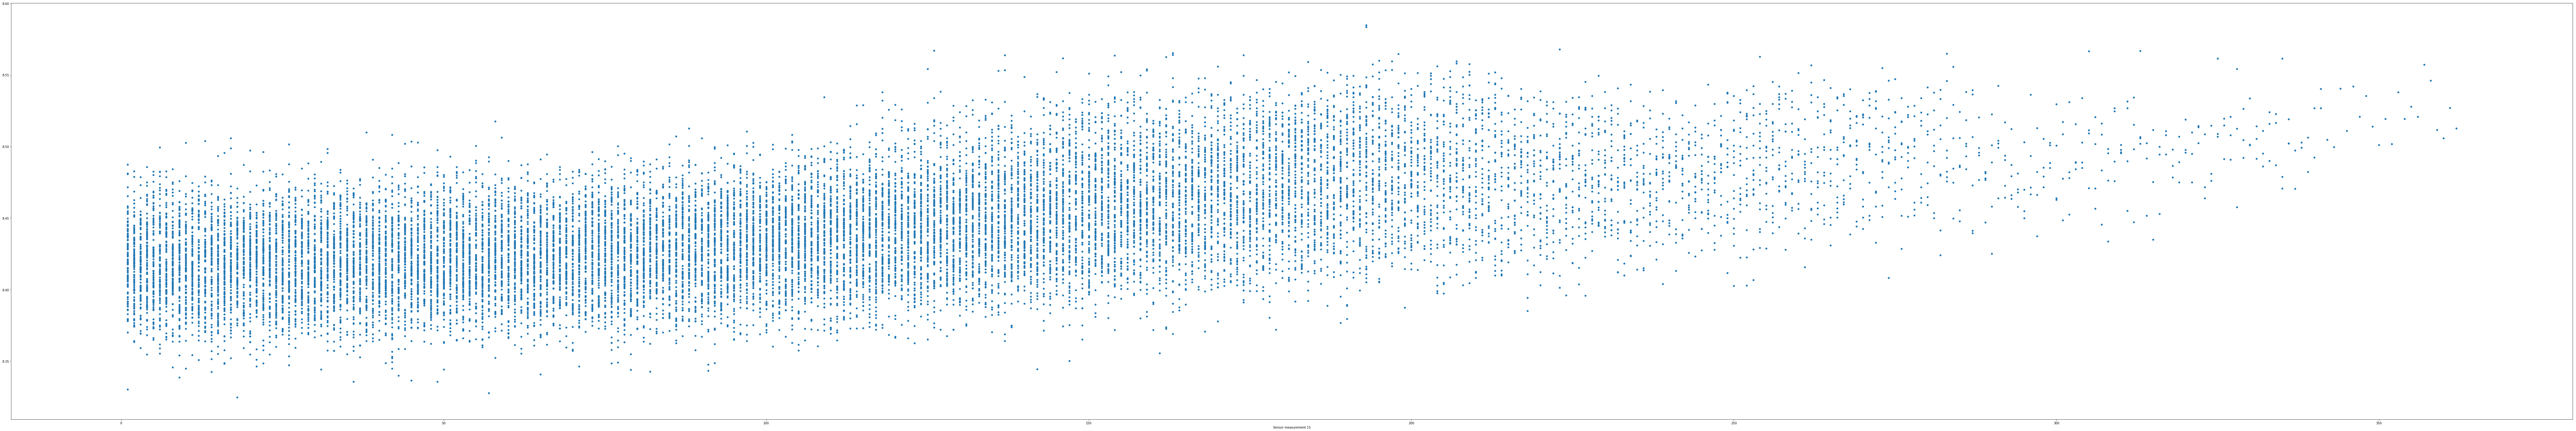

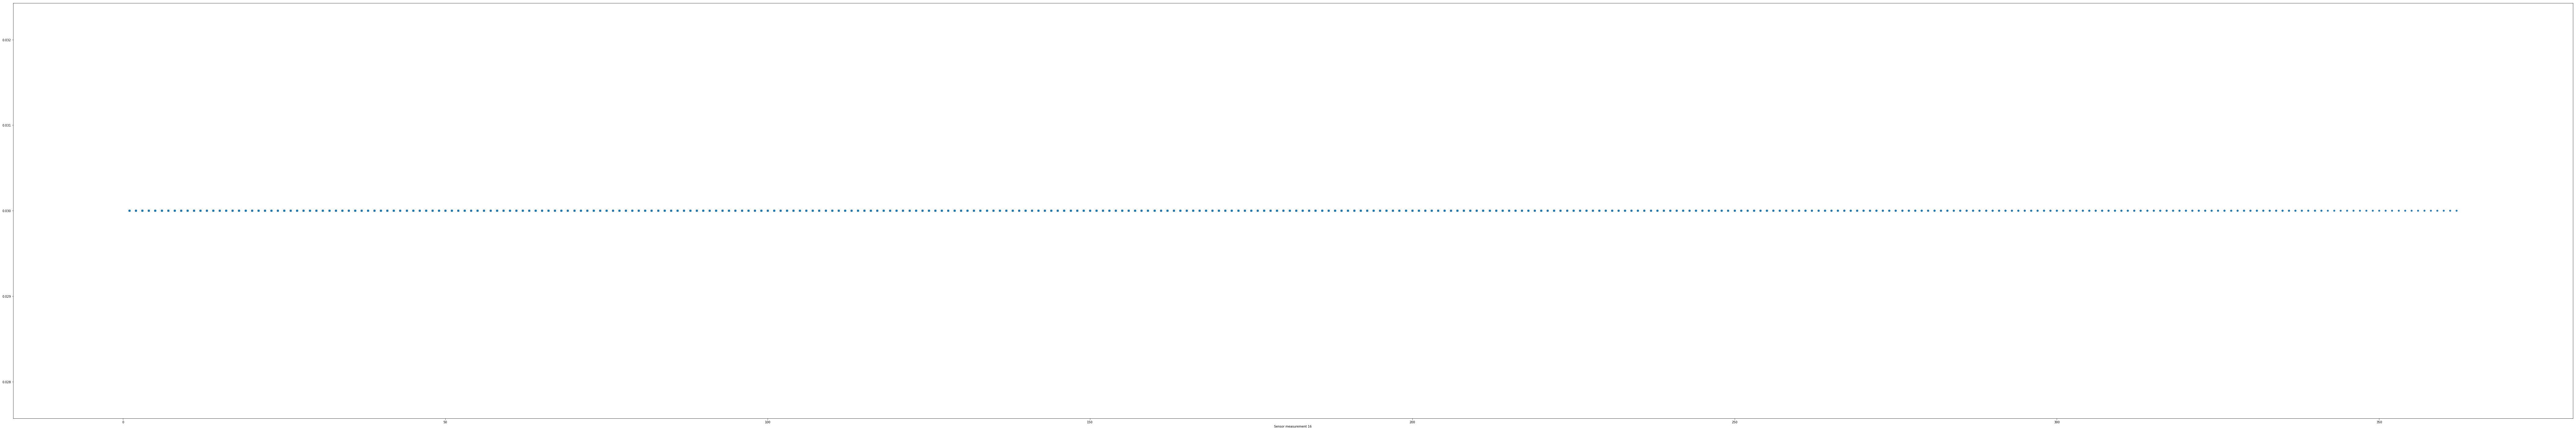

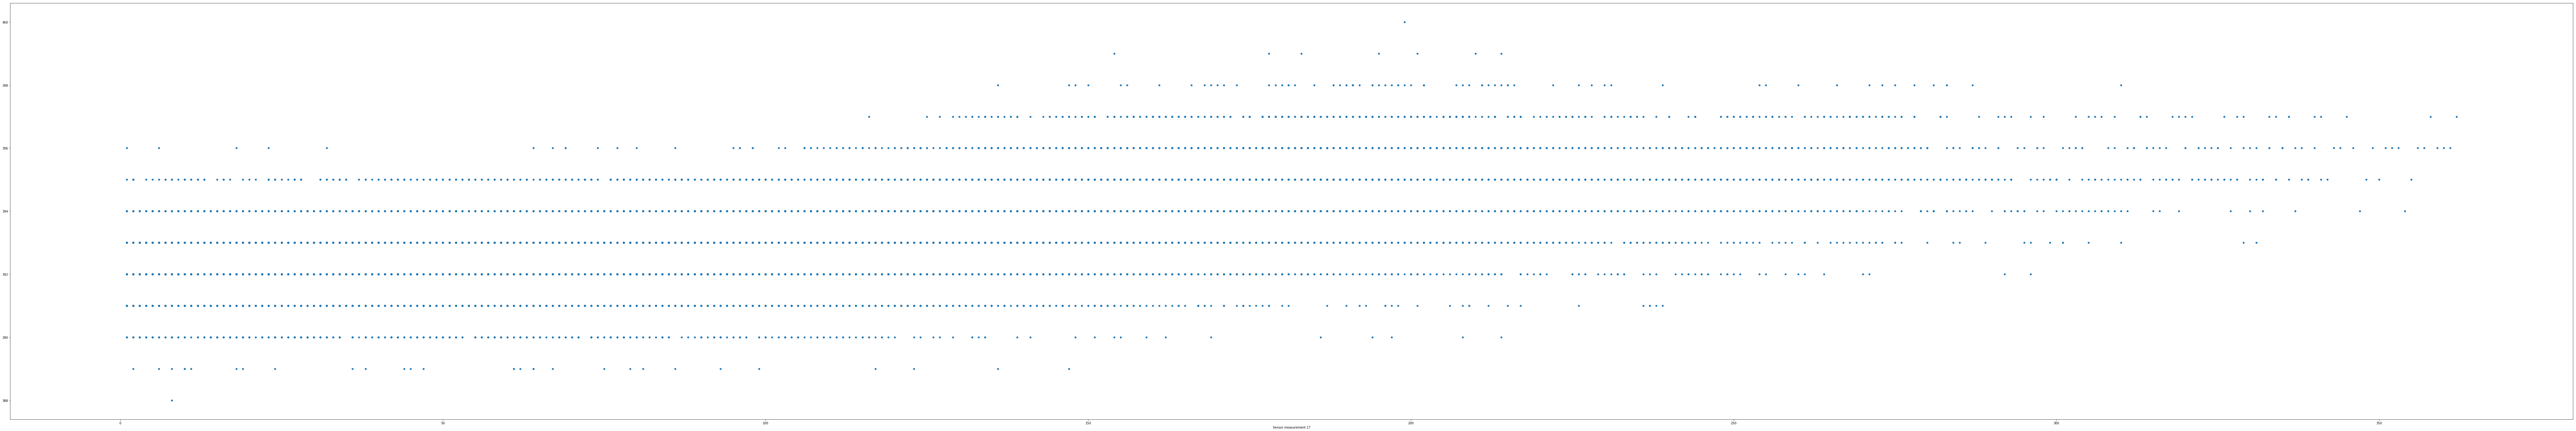

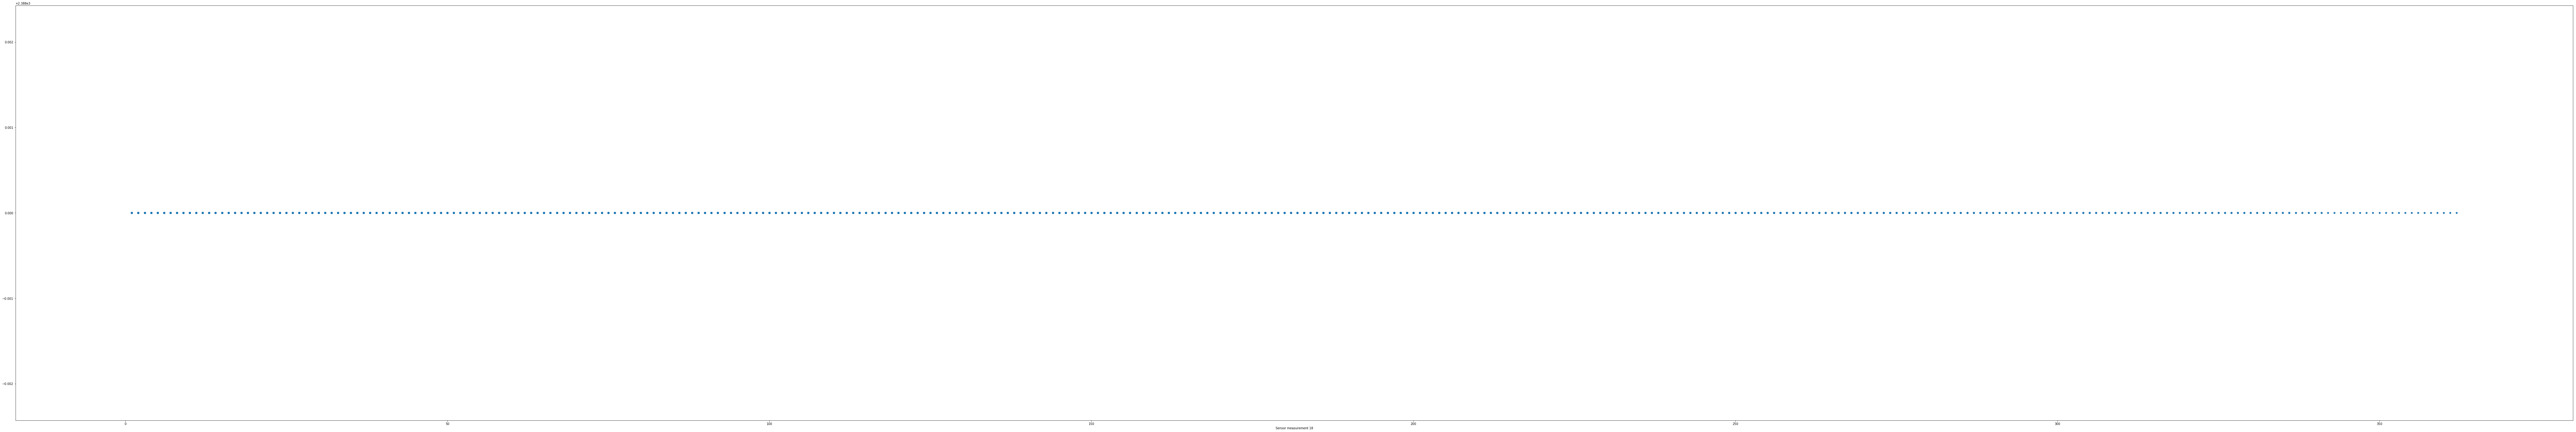

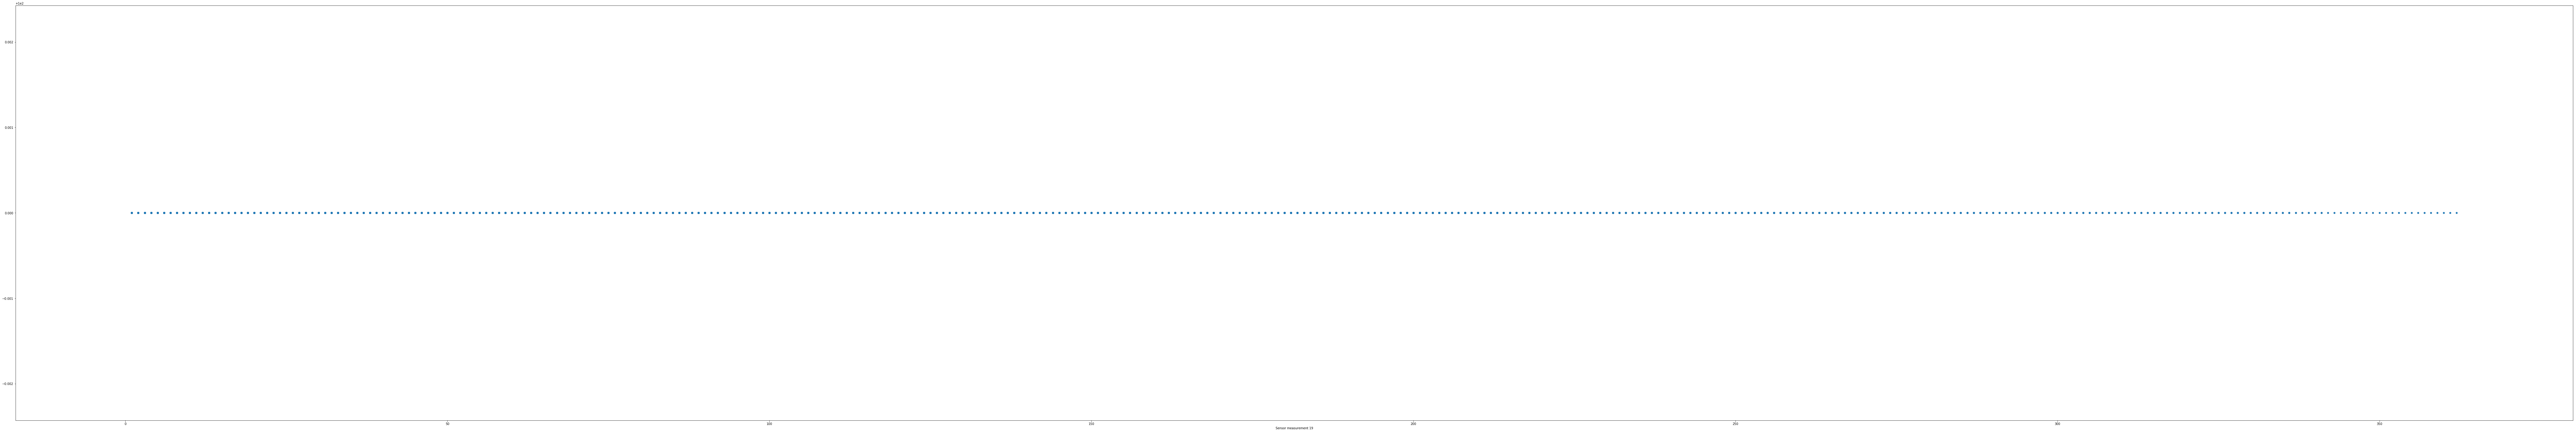

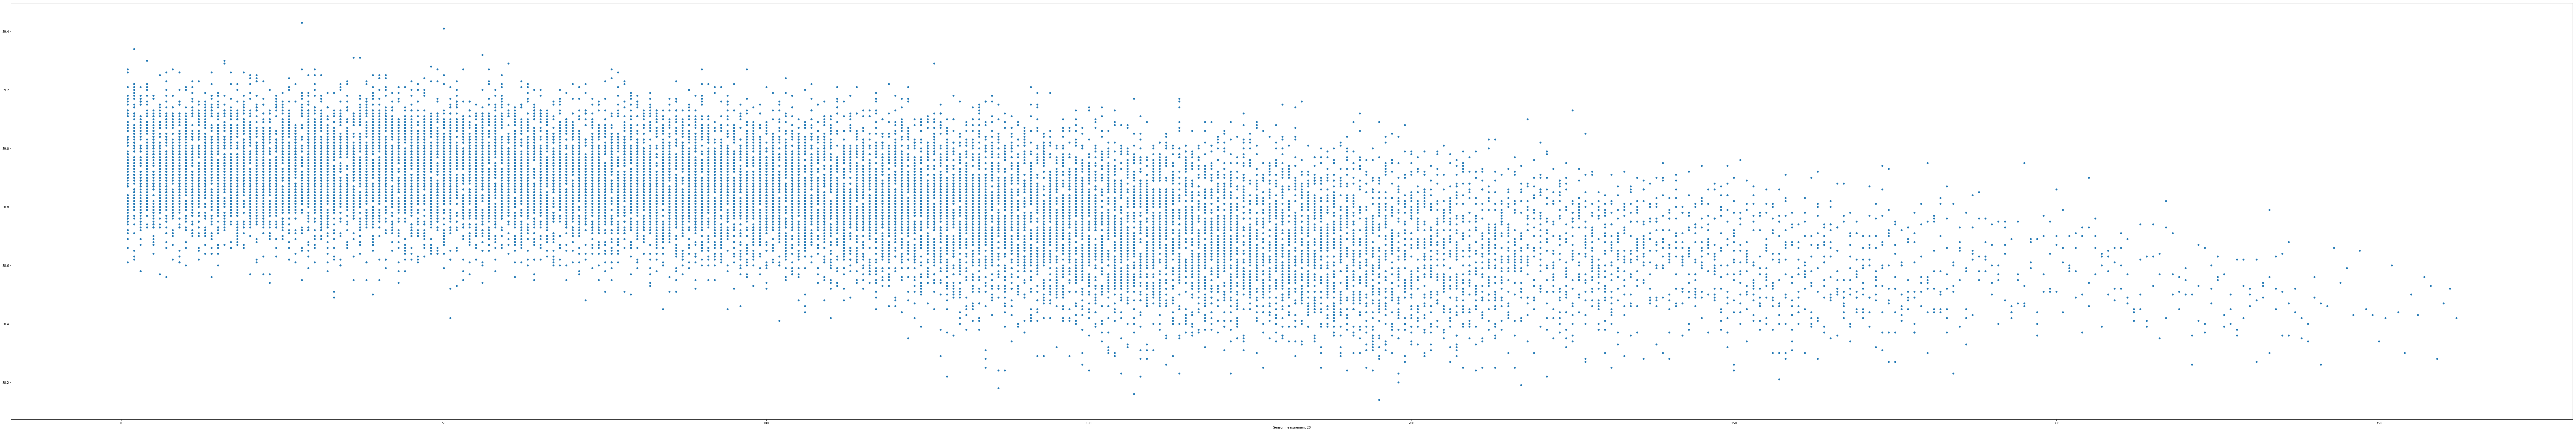

In [19]:
for i in range(1,21):
    fig, ax = plt.subplots(figsize=(150,25))

    string = "Sensor measurement " + str(i)
    cycles = df["Time, in cycles"]
    sensor = df[string]
    colors = (0,0,0)
    
    
    plt.scatter(cycles, sensor,linewidths=0.2)
    ax.set_xlabel(string)

## Outlier detection

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<Figure size 432x288 with 0 Axes>

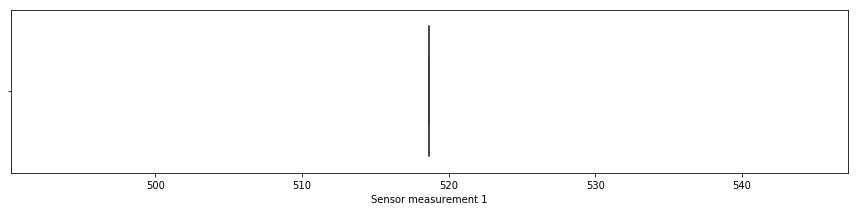

<Figure size 432x288 with 0 Axes>

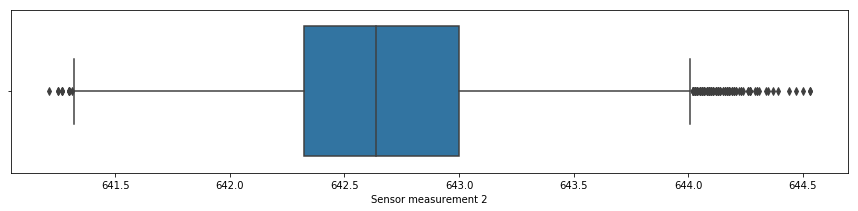

<Figure size 432x288 with 0 Axes>

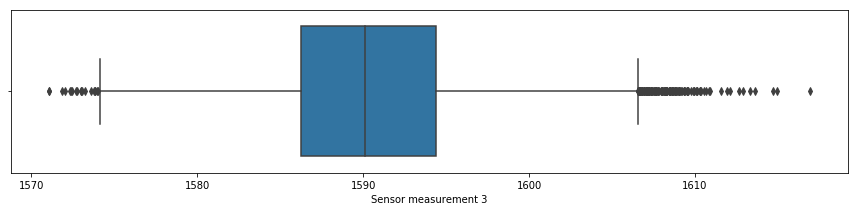

<Figure size 432x288 with 0 Axes>

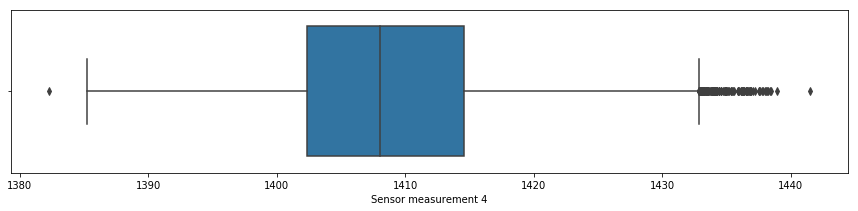

<Figure size 432x288 with 0 Axes>

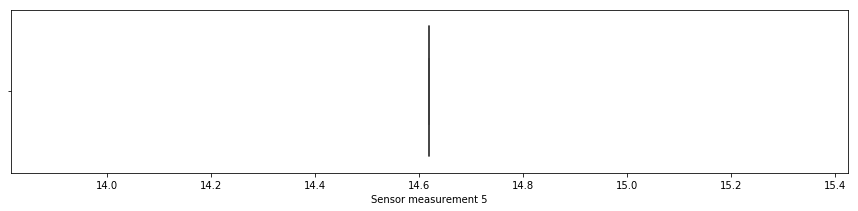

<Figure size 432x288 with 0 Axes>

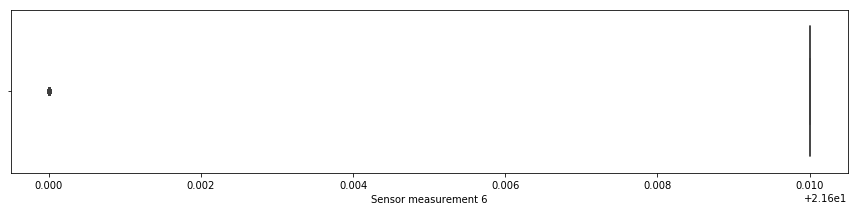

<Figure size 432x288 with 0 Axes>

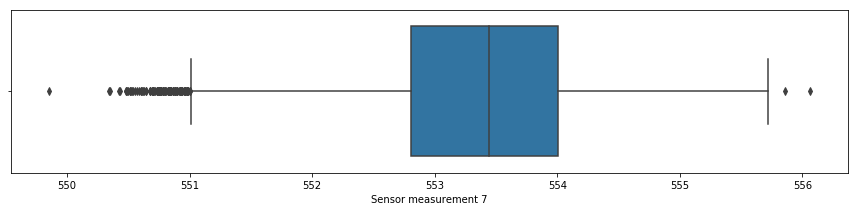

<Figure size 432x288 with 0 Axes>

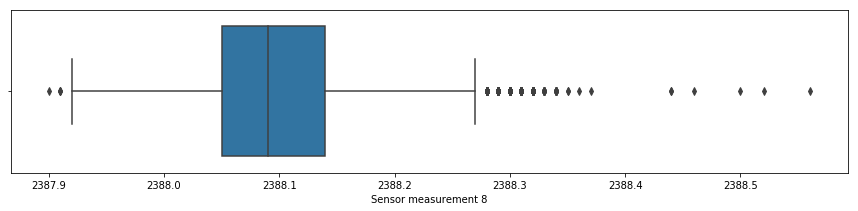

<Figure size 432x288 with 0 Axes>

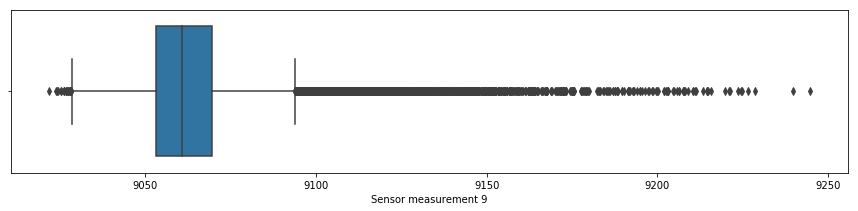

<Figure size 432x288 with 0 Axes>

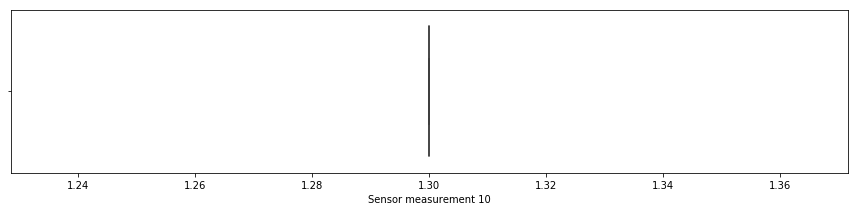

<Figure size 432x288 with 0 Axes>

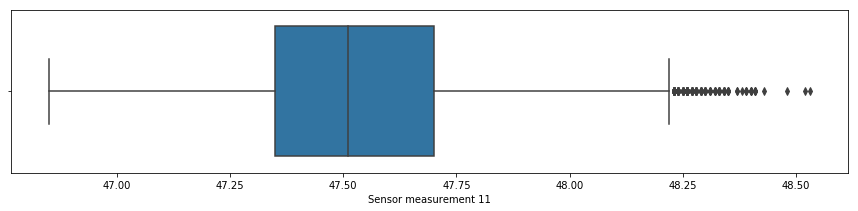

<Figure size 432x288 with 0 Axes>

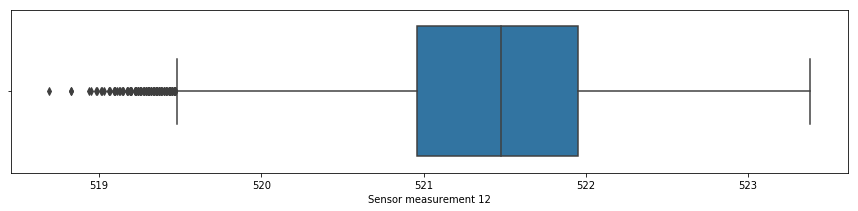

<Figure size 432x288 with 0 Axes>

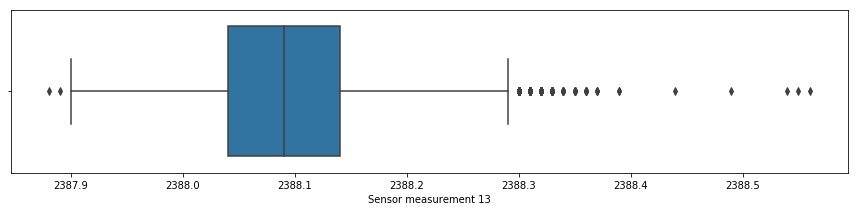

<Figure size 432x288 with 0 Axes>

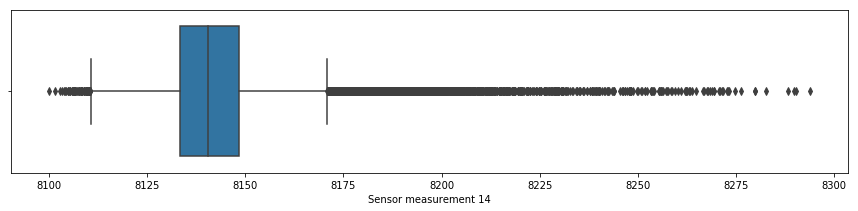

<Figure size 432x288 with 0 Axes>

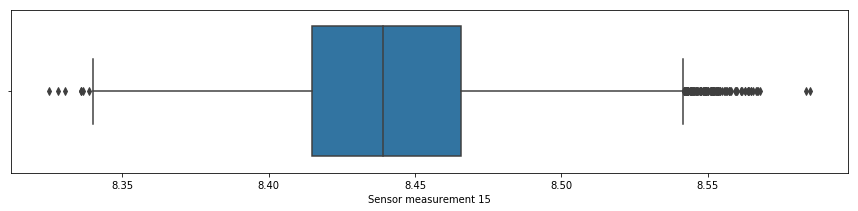

<Figure size 432x288 with 0 Axes>

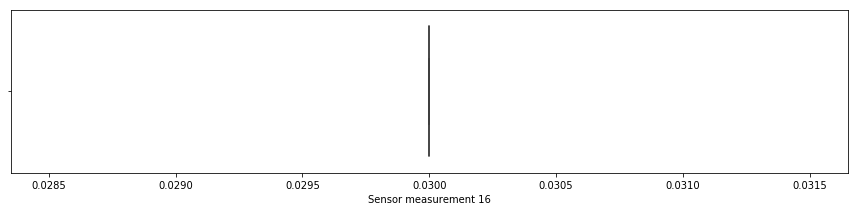

<Figure size 432x288 with 0 Axes>

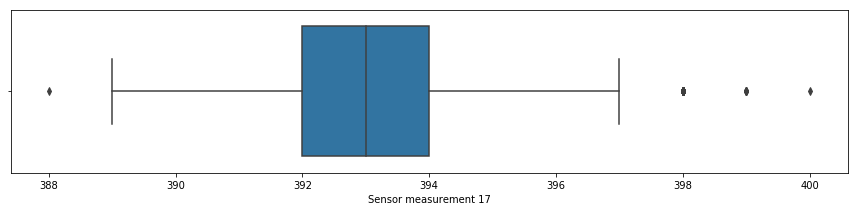

<Figure size 432x288 with 0 Axes>

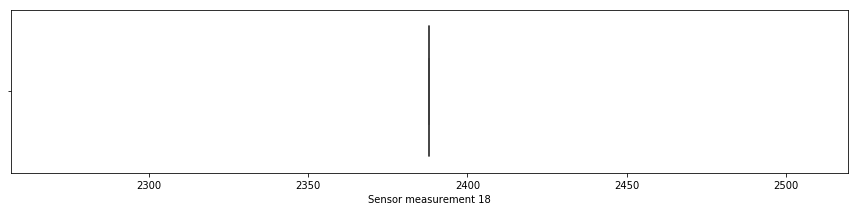

<Figure size 432x288 with 0 Axes>

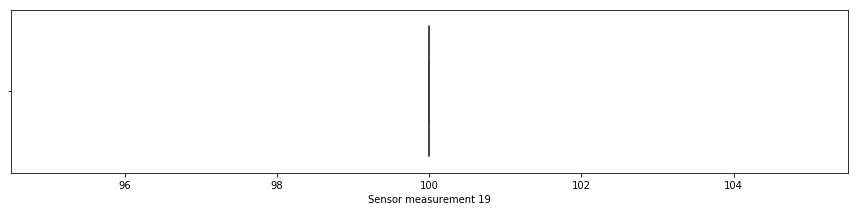

<Figure size 432x288 with 0 Axes>

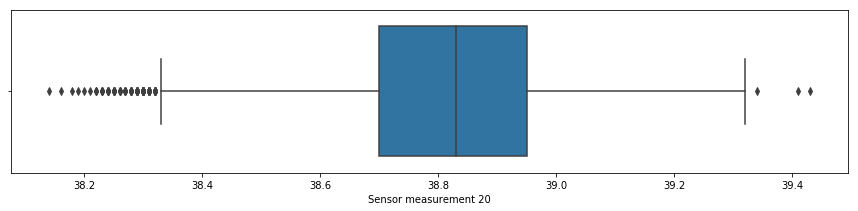

In [18]:
import seaborn as sns
for i in range(1,21):
    string = 'Sensor measurement ' + str(i)
    plt.figure()
    plt.figure(figsize=(15,3))
    sns.boxplot(x=df[string])


In [38]:
# Removing outliers

from scipy import stats
import numpy as np
import sys
z = np.abs(stats.zscore(df))
z




array([[1.72808356, 1.56517022, 0.31597968, ...,        nan, 1.34849274,
        1.19442705],
       [1.72808356, 1.55065208, 0.87272193, ...,        nan, 1.01652793,
        1.23692196],
       [1.72808356, 1.53613393, 1.96187421, ...,        nan, 0.73989059,
        0.50342281],
       ...,
       [1.65920407, 1.29490444, 0.18693254, ...,        nan, 2.08181033,
        3.29248147],
       [1.65920407, 1.30942258, 0.49885685, ...,        nan, 2.91172236,
        2.08507166],
       [1.65920407, 1.32394073, 1.458962  , ...,        nan, 2.46910261,
        2.19408035]])